In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
from os.path import join
import json
import h5py
import pprint
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.io import load_json
from utils.text import temporal_keywords, get_temporal_sentences_by_keyword, plot_distribution_of_temporal_sentences

In [6]:
# set data root
data_root = "/ssd/pbagad/datasets/vatex/"

# load annotations
train = load_json(join(data_root, "vatex_training_v1.0.json"))
val = load_json(join(data_root, "vatex_validation_v1.0.json"))
data = train + val

In [8]:
# keep only eng captions
data = list(map(lambda x: {k:v for k, v in x.items() if k != "chCap"}, data))

In [9]:
len(data)

28991

In [10]:
data[0]

{'videoID': 'Ptf_2VRj-V0_000122_000132',
 'enCap': ['People wearing harnesses using ropes to climb up a rock slope.',
  'A person climbing down a rock edge while someone talks about donating to a cause.',
  'A person is repelling down a rock while a girl asks for donations.',
  'A woman is describing some fears you may have while rock climbing.',
  'A woman is shown rock climbing and coming down from the rock, she then hugs a man when she is down.',
  'a man going down a rock cliff using a harness and rope with another person nearby',
  'A woman is narrating in the background as mountain climbers scale the side of a mountain.',
  'A woman is talking as people are using ropes lo lower themselves down a mountain.',
  'A group of people watch as woman scales down the side of a mountain.',
  'A woman climbs on a rock formation using safety ropes to protect her.']}

In [11]:
captions = []
for x in data:
    captions.extend(x["enCap"])

In [12]:
len(captions)

289910

In [14]:
temporal_captions = get_temporal_sentences_by_keyword(captions, temporal_keywords)

Getting temporal sentences for keywords: 100%|████████████████████████████████████████████████| 6/6 [00:00<00:00,  9.53it/s]


In [17]:
len(temporal_captions), len(temporal_captions["after"])

(6, 1637)

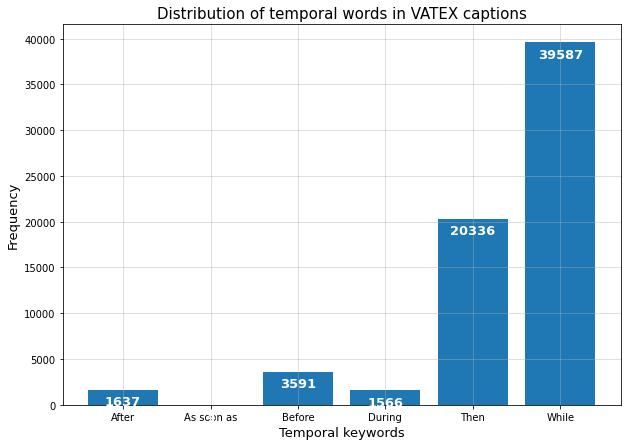

In [24]:
plot_distribution_of_temporal_sentences(temporal_captions, "VATEX", yoffsets=-2000)